<a href="https://colab.research.google.com/github/msritian/shivam/blob/master/KNN_algo_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CALL functions**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading a data set**

In [ ]:
iris_data= pd.read_csv('https://raw.githubusercontent.com/kusumikakd/Datasets/master/Datasets/iris.csv')

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_data.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris_data.shape

(150, 5)

In [ ]:
iris_data.loc[:,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_data.loc[:,'species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
iris_data.iloc[:,4]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Ploting the given data(scattered plot)**

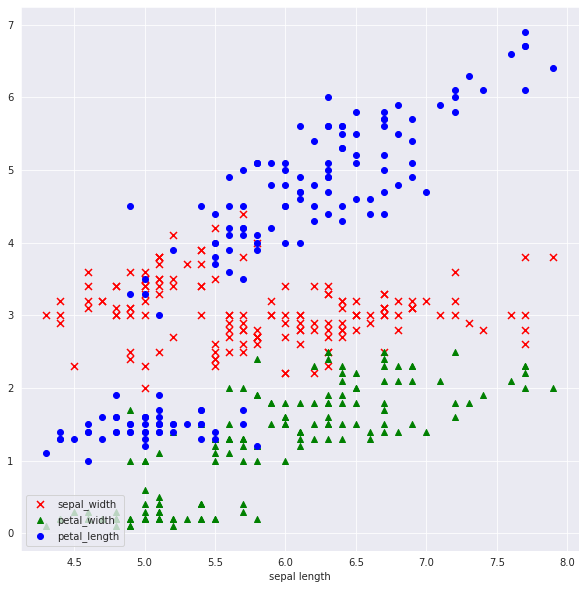

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
plt.scatter(x=iris_data['sepal_length'], y=iris_data['sepal_width'], label ='sepal_width', marker='x', c='red', s=49)
plt.scatter(x=iris_data['sepal_length'], y=iris_data['petal_width'], label='petal_width', marker='^', c='green')
plt.scatter(x=iris_data['sepal_length'], y=iris_data['petal_length'], label='petal_length', marker='o', c='blue')
plt.xlabel("sepal length")
plt.legend(loc=3)

In [ ]:
s1=iris_data.iloc[ 1:50,:]
s2=iris_data.iloc[ 51:100, :]
s3=iris_data.iloc[101:150, :]

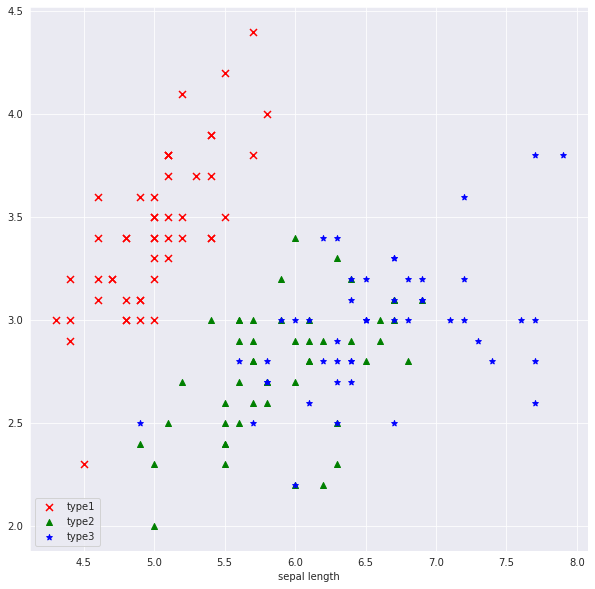

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
plt.scatter(x=s1.iloc[:,0], y=s1.iloc[:,1], label ='type1', marker='x', c='red', s=49)
plt.scatter(x=s2.iloc[:,0], y=s2.iloc[:,1], label='type2', marker='^', c='green')
plt.scatter(x=s3.iloc[:,0], y=s3.iloc[:,1], label='type3', marker='*', c='blue')
## plt.scatter(x=iris_data['sepal_length'], y=iris_data['petal_width'], label='petal_width', marker='^', c='green')
plt.xlabel("sepal length")
plt.legend(loc=3)

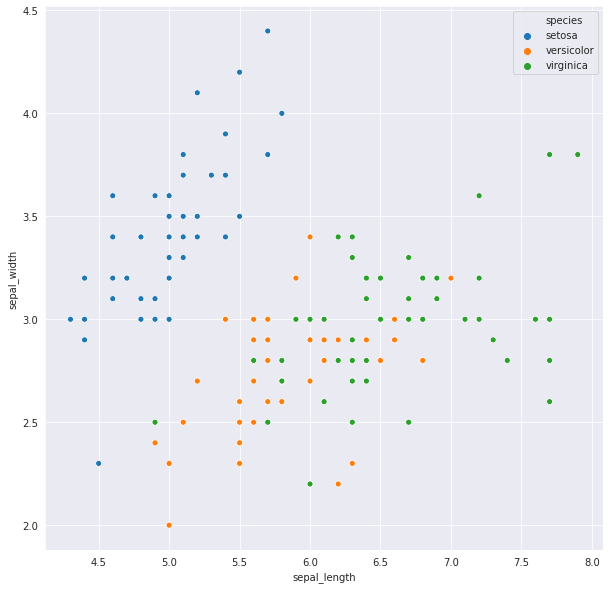

In [ ]:
plt.figure(figsize=(10,10))
##sns.scatterplot(x='sepal_length', y= 'sepal_width', data=iris_data, hue='species', size='species')
sns.scatterplot(x='sepal_length', y= 'sepal_width', data=iris_data, hue='species')
plt.show()

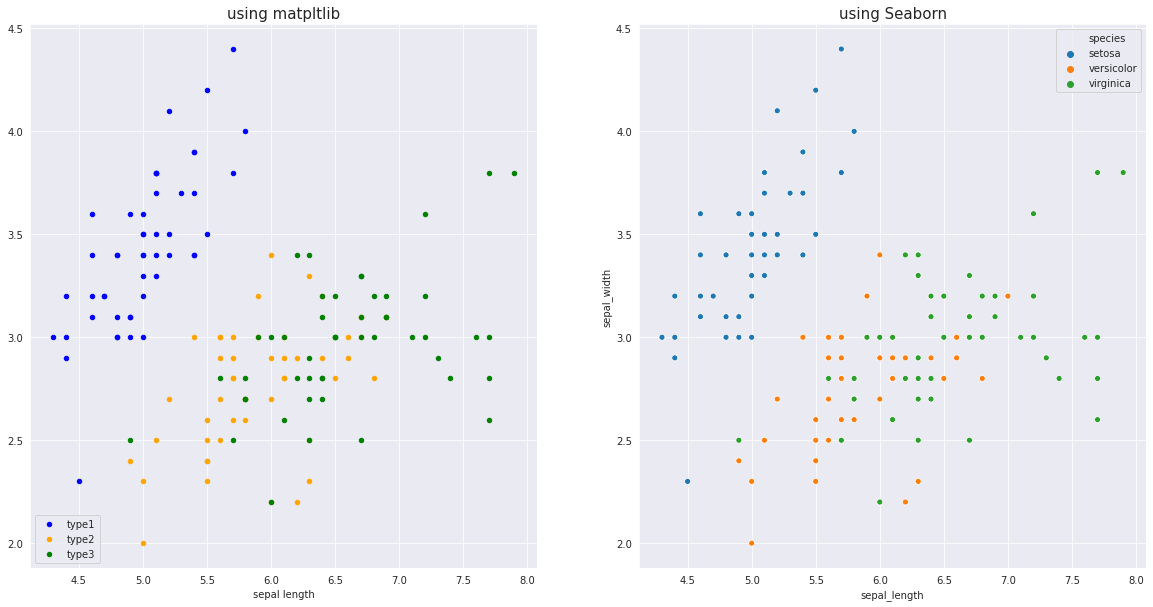

In [ ]:
fig = plt.figure(figsize=(20,10))
a1 = fig.add_subplot(1, 2, 1) 
##plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
plt.scatter(x=s1.iloc[:,0], y=s1.iloc[:,1], label ='type1', marker='o', c='blue', s=20)
plt.scatter(x=s2.iloc[:,0], y=s2.iloc[:,1], label='type2', marker='o', c='orange', s=20)
plt.scatter(x=s3.iloc[:,0], y=s3.iloc[:,1], label='type3', marker='o', c='green', s=20)
## plt.scatter(x=iris_data['sepal_length'], y=iris_data['petal_width'], label='petal_width', marker='^', c='green')
plt.xlabel("sepal length")
plt.legend(loc=3)
a1.set_title ('using matpltlib', fontsize = 15)
a1= fig.add_subplot(1,2,2)
##plt.figure(figsize=(10,10))
sns.scatterplot(x='sepal_length', y= 'sepal_width', data=iris_data, hue='species')

a1.set_title ('using Seaborn', fontsize = 15)
plt.show()

**Splitting data**

In [ ]:
x=iris_data.iloc[1:,:4]#features
y=iris_data.iloc[1:,4:]#class labels

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#test_size determines the percentage of test data you want here
#train=80% and test=20% data is randomly split

In [ ]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
12,4.8,3.0,1.4,0.1
36,5.5,3.5,1.3,0.2
141,6.9,3.1,5.1,2.3
4,5.0,3.6,1.4,0.2
89,5.5,2.5,4.0,1.3
...,...,...,...,...
30,4.8,3.1,1.6,0.2
11,4.8,3.4,1.6,0.2
86,6.7,3.1,4.7,1.5
19,5.1,3.8,1.5,0.3


In [ ]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
x_test.shape

(30, 3)

In [ ]:
y_test.shape

(30, 1)

**classification using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore") #to remove unwanted warnings

In [ ]:
k_range= range(1,26)
scores={}
scores_list=[]
for  k in k_range:
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
scores

In [ ]:
from sklearn.metrics import confusion_matrix

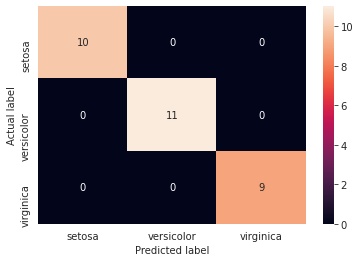

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
##plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**KNN method 2**

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=4)
knn1.fit(iris_data.iloc[1:,:4],iris_data.iloc[1:,4:])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
testSet = [[3.4, 5.6, 5.4, 6.2]]
test = pd.DataFrame(testSet)
##test = pd.DataFrame(x_test)
print(test)
print("predicted:",knn1.predict(test))
##print("neighbors",knn1.kneighbors(test))

     0    1    2    3
0  3.4  5.6  5.4  6.2
predicted: ['virginica']


In [ ]:
x_test

,sepal_length,sepal_width,petal_length
104,6.5,3.0,5.8
69,5.6,2.5,3.9
111,6.4,2.7,5.3
29,4.7,3.2,1.6
63,6.1,2.9,4.7
96,5.7,2.9,4.2
125,7.2,3.2,6.0
46,5.1,3.8,1.6
15,5.7,4.4,1.5
44,5.1,3.8,1.9
